In [3]:
pip install tensorflow


  Using cached tensorflow-2.10.0-cp39-cp39-win_amd64.whl (455.9 MB)



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\Mritunjay Sharma\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
#import the libraries as shown below
from tensorflow.keras.layers import Input,Lambda, Dense, Flatten

In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob 
import matplotlib.pyplot as plt

In [9]:
#re-size all the images to this
IMAGE_SIZE = [224,224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [10]:
#Import the resnet 50 library as shown below and add preprocessing layer to the front of VGG
#here we will be using imagenet weights
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [11]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [12]:
#don't train existing weights
for layer in resnet.layers:
    layer.trainable = False
    

In [14]:
#useful for getting number of output classes
folders = glob('Datasets/train/*')

In [15]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [19]:
#now flattening the output of resnet layers
# - you can ass more if you want
x = Flatten()(resnet.output)

In [20]:
prediction = Dense(len(folders), activation = 'softmax')(x)
#create a model object
model = Model(inputs = resnet.input, outputs = prediction)


In [21]:
#view the structure of the model 
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [22]:
#tell the model what cost and optimization method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
)

In [23]:
#use the Image Data Generator to impart the images from the dataset
#we will do data augmentation which will create new image using present images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [27]:
#make sure you provide the same target size as initialized for the image size
#this is a special function flow_from_directory
training_set = train_datagen.flow_from_directory('Datasets/train',
                                           target_size = (224,224),
                                           batch_size = 32,
                                           class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [29]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [30]:
#fit model 
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

C:\Users\MRITUN~1\AppData\Local\Temp/ipykernel_1176/2164123563.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 27s 15s/step - loss: 5.2303 - accuracy: 0.3281 - val_loss: 12.5297 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 17s 12s/step - loss: 14.1105 - accuracy: 0.2969 - val_loss: 6.0464 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 17s 12s/step - loss: 4.8160 - accuracy: 0.3281 - val_loss: 4.6752 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 17s 12s/step - loss: 5.0215 - accuracy: 0.3906 - val_loss: 6.1579 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 17s 12s/step - loss: 4.0628 - accuracy: 0.3906 - val_loss: 1.6286 - val_accuracy: 0.5345
Epoch 6/50
2/2 [==============================] - 19s 14s/step - loss: 2.0122 - accuracy: 0.5156 - val_loss: 3.9647 - val_accuracy: 0.3103
Epoch 7/50
2/2 [==============================] - 19s 13s/step - loss: 3.7077 - accuracy: 0.4531 - val_loss: 3.3780 - val_accuracy: 0.5345
Epoch 8/50
2/2 [=========

In [32]:
r.history

{'loss': [5.2302775382995605,
  14.110492706298828,
  4.815979957580566,
  5.021463394165039,
  4.062811851501465,
  2.012209415435791,
  3.7076687812805176,
  2.7360541820526123,
  1.209999442100525,
  2.556790590286255,
  1.105793833732605,
  1.5222378969192505,
  1.1732821464538574,
  0.8604850769042969,
  1.0960783958435059,
  0.7551640272140503,
  0.9229891300201416,
  0.7655501365661621,
  0.7485464215278625,
  0.6803343296051025,
  0.7068831324577332,
  0.4839068055152893,
  0.5268365144729614,
  0.40912094712257385,
  0.5040631294250488,
  0.29704180359840393,
  0.4768092632293701,
  0.35091084241867065,
  0.4192393124103546,
  0.38937893509864807,
  0.29554787278175354,
  0.2984510064125061,
  0.34165292978286743,
  0.26683610677719116,
  0.30553704500198364,
  0.280571848154068,
  0.2856648564338684,
  0.26751601696014404,
  0.2864798307418823,
  0.2564268708229065,
  0.255753755569458,
  0.2766866683959961,
  0.25000622868537903,
  0.2716639041900635,
  0.247944176197052,
  

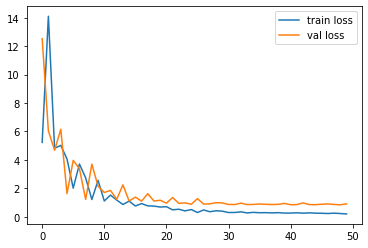

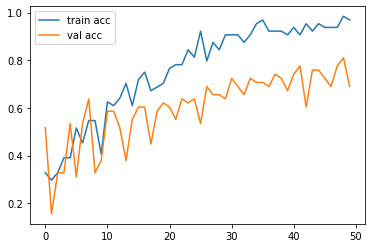

<Figure size 432x288 with 0 Axes>

In [33]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [35]:
#save the model as h5 file
from tensorflow.keras.models import load_model
model.save('resnet50_model.h5')

In [36]:
y_pred = model.predict(test_set)

2/2 [==============================] - 10s 4s/step


In [38]:
y_pred
#these three values will give the probability of given car to being  audi, lamborghini, mercedes

array([[4.16685082e-02, 3.41168076e-01, 6.17163479e-01],
       [2.34917570e-02, 6.59496412e-02, 9.10558641e-01],
       [1.02464734e-02, 2.18935357e-03, 9.87564147e-01],
       [4.50680312e-03, 9.09214556e-01, 8.62786025e-02],
       [2.76681576e-02, 2.88332313e-01, 6.83999479e-01],
       [9.54916328e-02, 5.10298014e-01, 3.94210428e-01],
       [9.26250696e-01, 3.01712807e-02, 4.35779989e-02],
       [4.37031947e-02, 7.42665291e-01, 2.13631451e-01],
       [1.81037948e-01, 2.59330213e-01, 5.59631824e-01],
       [4.72543627e-01, 1.46174086e-02, 5.12839019e-01],
       [6.08053327e-01, 2.75320172e-01, 1.16626494e-01],
       [1.46239638e-01, 4.53610986e-01, 4.00149405e-01],
       [2.42325261e-01, 6.86609507e-01, 7.10651651e-02],
       [2.58598011e-02, 7.44246459e-03, 9.66697812e-01],
       [2.31005214e-02, 9.22946393e-01, 5.39531745e-02],
       [4.54686142e-06, 5.56425191e-04, 9.99439061e-01],
       [1.63410649e-01, 3.96362603e-01, 4.40226704e-01],
       [1.88555755e-02, 5.82342

In [39]:
import numpy as np
y_pred = np.argmax(y_pred, axis = 1)

In [40]:
y_pred

array([2, 2, 2, 1, 2, 1, 0, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 2, 2], dtype=int64)

In [41]:
#now i have to test for my new dataset
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [42]:
model = load_model('resnet50_model.h5')

In [43]:
img_data

NameError: name 'img_data' is not defined

In [44]:


img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [45]:


x=image.img_to_array(img)
x



array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [194., 188., 174.],
        [215., 209., 197.],
        [241., 235., 223.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [247., 245., 233.],
        [245., 242., 233.],
        [244., 241., 232.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 248., 241.],
        [244., 250., 248.],
        [244., 250., 248.]],

       ...,

       [[190., 206., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[187., 205., 227.],
        [187., 205., 227.],
        [187., 205., 227.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [187., 2

In [46]:


x.shape



(224, 224, 3)

In [47]:
x=x/255

In [48]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [49]:
model.predict(img_data)

1/1 [==============================] - 7s 7s/step


array([[0.00240946, 0.00305999, 0.9945306 ]], dtype=float32)

In [50]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 253ms/step


In [51]:
a==1

array([False])